In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style='white', context='poster')
import umap

### To replicate the process, run the notebook from here. 
This notebook relies on the first two steps outlined in the README (Hint: 1. Download Data, 2. Run load.py)

In [2]:
df = pd.read_csv('../data/full_labels_df.csv', error_bad_lines=False)
loaded = np.load('../data/full_image_arr.npz')

In [3]:
bw_img = loaded['b']

In [4]:
bw_img = bw_img/255

In [5]:
column_title = {'masterCategory': 'Master Categories', 'subCategory': 'Sub-Categories', 'articleType':'Article Types', 'season':'Season', 'gender': 'Gender', 'baseColour':'Base Color'}

In [6]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(bw_img)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 32 separate connected components using meta-embedding (experimental)
  n_components
/Users/Kelly/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [137]:
### Saving is optional. Saves time if you want to reuse. 
np.save('umap.npy', embedding)

### To plot results without running TSNE, run the notebook from here. 
If you started from the beginning, skip the next cell!

In [ ]:
### Reminder : If you started from the beginning, skip THIS
embedding = np.load('umap.npy')

In [265]:
sns.set_palette("pastel")

In [278]:
def plot_UMAP(embedding, column, font=14, cm='plasma'):
    #cmap = sns.choose_colorbrewer_palette("husl", 8, as_cmap=True)
    classes = list(df[column].value_counts().index)
    labels = df[column].astype('category').cat.codes
    n_classes = len(classes)
    fig, ax = plt.subplots(1, figsize=(18, 14))
    plt.scatter(*embedding.T, s=0.3, c=labels,cmap=cm, alpha=1.0)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(boundaries=np.arange(n_classes+1)-0.5)
    cbar.set_ticks(np.arange(n_classes))
    cbar.ax.set_yticklabels(classes, fontsize=font)
    plt.title(f'Inventory Images with UMAP Dimension Reduction \n Color Coded by {column_title[column]}');

In [269]:
col_map = sns.choose_cubehelix_palette(as_cmap=True)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

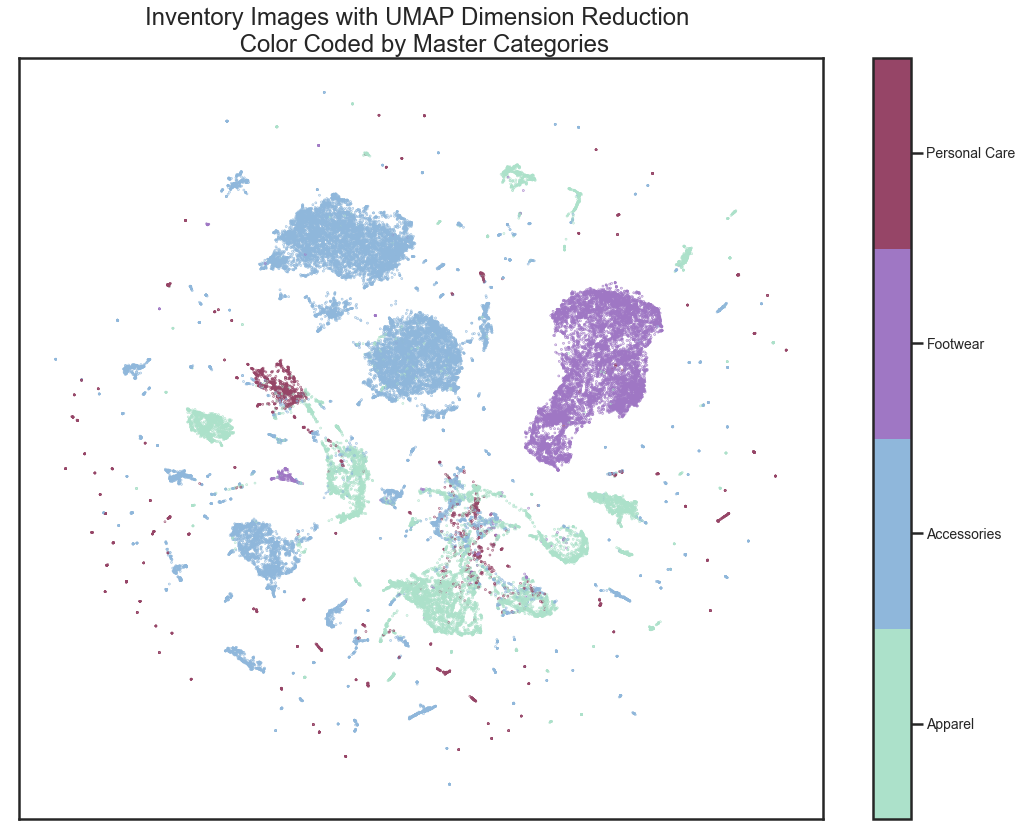

In [279]:
plot_UMAP(embedding, 'masterCategory', cm = col_map)

In [282]:
cb1 = sns.choose_colorbrewer_palette('divergent',as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

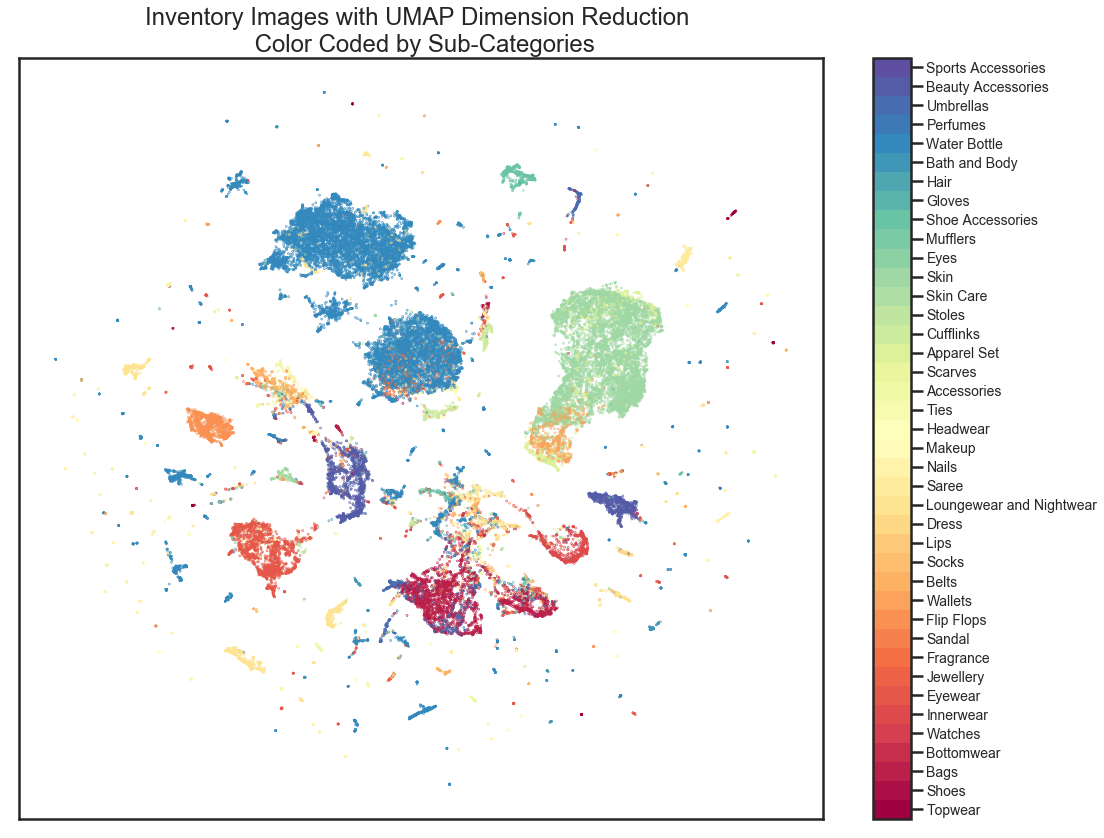

In [284]:
plot_UMAP(embedding, 'subCategory', cm=cb1)

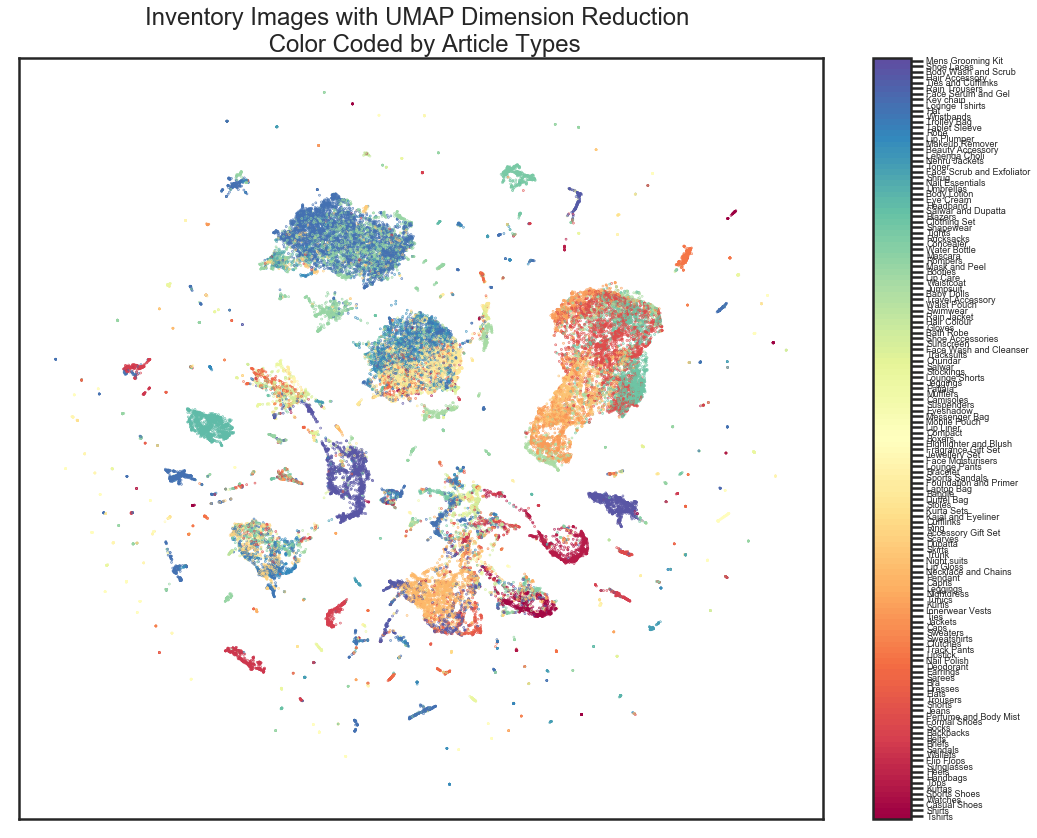

In [126]:
plot_UMAP(embedding, 'articleType', font=9)

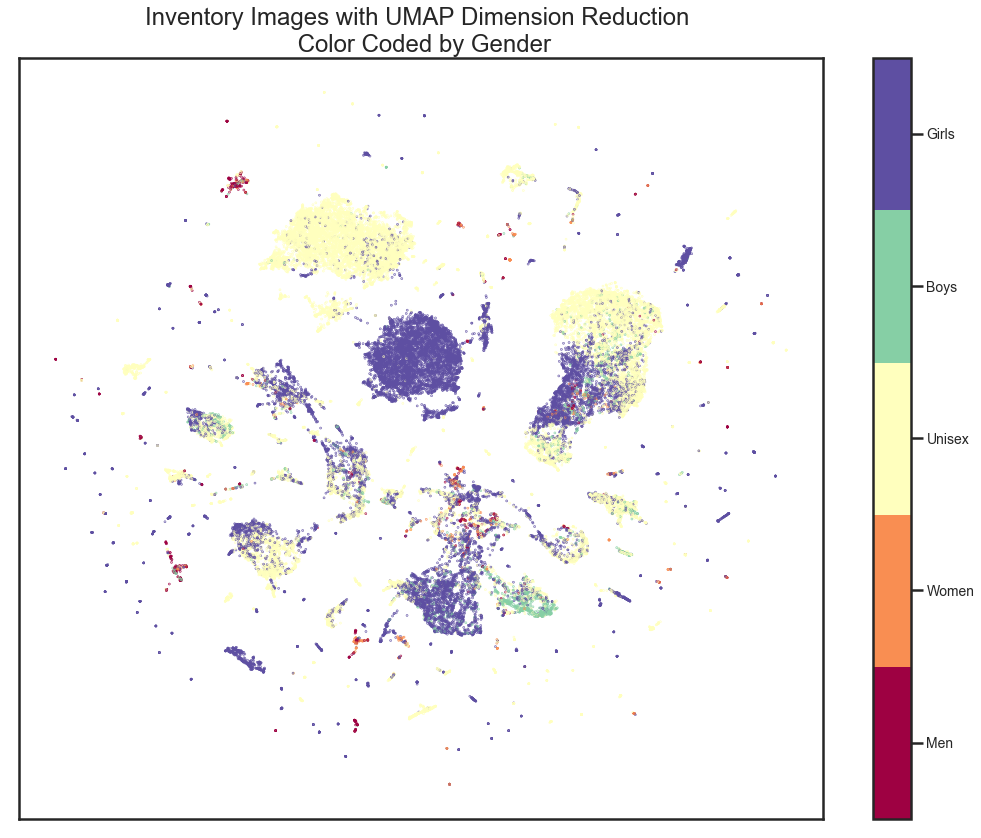

In [127]:
plot_UMAP(embedding, 'gender')